x_train shape: (48000, 28, 28, 1)
y_train shape: (48000,)

x_val shape: (12000, 28, 28, 1)
y_val shape: (12000,)

x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)



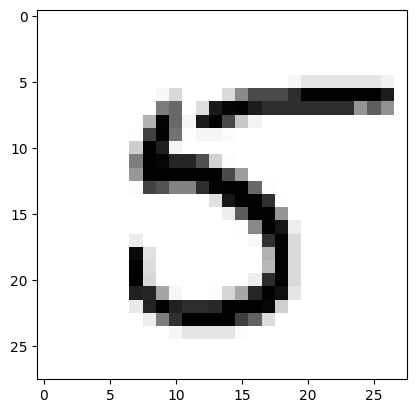

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
import copy
import random
from IPython import display
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.


x_train, x_val = train_test_split(x_train, random_state=42, train_size=0.8, shuffle=True)
y_train, y_val = train_test_split(y_train, random_state=42, train_size=0.8, shuffle=True)


x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_val = np.reshape(x_val, (len(x_val), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}\n')

print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}\n')

print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}\n')

plt.imshow(x_train[0], cmap='Greys')

# Add noise

In [43]:
from PIL import Image
import random

def add_noise(img, noise_factor = 0.5):
    for i in range(len(img)):
        for j in range(len(img[0])):
            img[i][j] = max(0, min(1, img[i][j] + random.uniform(-noise_factor, noise_factor)))
    return img

In [44]:
x_train_0_5 = copy.deepcopy(x_train)
x_train_1 = copy.deepcopy(x_train)
x_train_1_5 = copy.deepcopy(x_train)

x_test_0_5 = copy.deepcopy(x_test)
x_test_1 = copy.deepcopy(x_test)
x_test_1_5 = copy.deepcopy(x_test)

In [45]:
# add noise (train dataset)
for idx in tqdm(range(len(x_train))):
    x_train_0_5[idx] = add_noise(copy.deepcopy(x_train[idx]), 0.5)
    x_train_1[idx] = add_noise(copy.deepcopy(x_train[idx]), 1)
    x_train_1_5[idx] = add_noise(copy.deepcopy(x_train[idx]), 1.5)

100%|████████████████████████████████████████████████████████████████████████████| 48000/48000 [33:44<00:00, 23.71it/s]


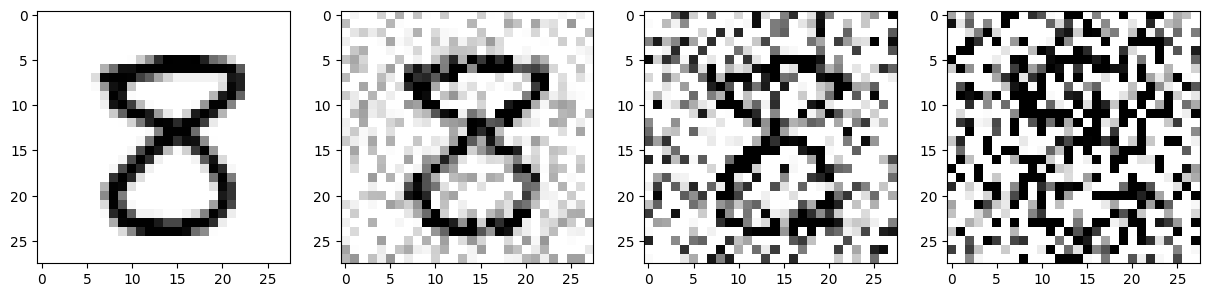

In [46]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(x_train[1000], cmap='Greys')
axes[1].imshow(x_train_0_5[1000], cmap='Greys')
axes[2].imshow(x_train_1[1000], cmap='Greys')
axes[3].imshow(x_train_1_5[1000], cmap='Greys')
plt.show()

In [47]:
# add noise (test dataset)
for idx in tqdm(range(len(x_test))):
    x_test_0_5[idx] = add_noise(copy.deepcopy(x_test[idx]), 0.5)
    x_test_1[idx] = add_noise(copy.deepcopy(x_test[idx]), 1)
    x_test_1_5[idx] = add_noise(copy.deepcopy(x_test[idx]), 1.5)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [06:58<00:00, 23.89it/s]


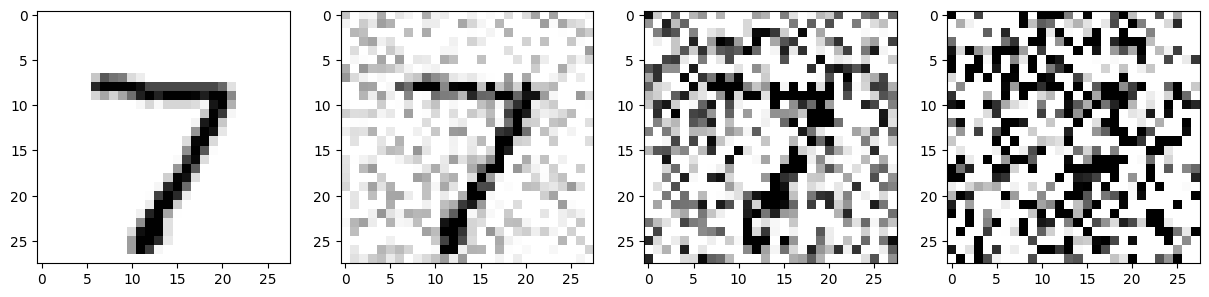

In [48]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(x_test[0], cmap='Greys')
axes[1].imshow(x_test_0_5[0], cmap='Greys')
axes[2].imshow(x_test_1[0], cmap='Greys')
axes[3].imshow(x_test_1_5[0], cmap='Greys')
plt.show()

# 1) TensorFlow Model

In [5]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

input_img = Input((28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

encoded = Dense(49, activation='relu')(x)
d = Dense(64, activation='relu')(encoded)
d = Dense(28 * 28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

autoencoder = keras.Model(input_img, decoded, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [243]:
def draw_result(x_test, n = 30, step = 0):
    imgs = x_test[step:step + n]
    decoded_imgs = autoencoder.predict(x_test[step:step + n], batch_size=n)

    plt.figure(figsize=(n, 2))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(imgs[i].squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax2 = plt.subplot(2, n, i + n + 1)
        plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)

    plt.show()

# Training

### Without noise

In [244]:
batch_size = 100
epochs = 20


# noise = 0
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0445
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0204
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0160
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0137
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0125
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0117
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0111
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0106
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0102
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0098
Epoch 11/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0095
Epoch 12/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0091
Epoch 13/20
600/600 [====

1/1 [==============================] - 0s 26ms/step


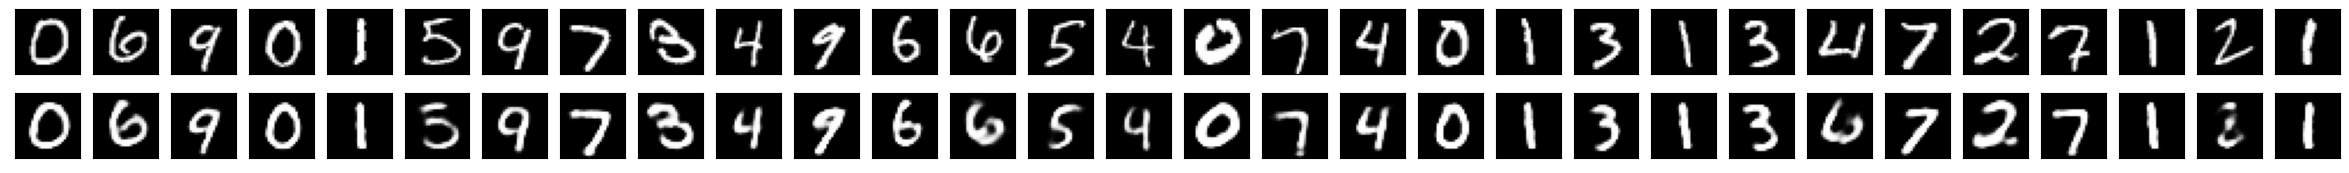

In [255]:
draw_result(x_test, 30, 100) # last argument - starting index in the dataset

### Noise = 0.5

In [247]:
batch_size = 100
epochs = 20


# noise = 0
autoencoder.fit(x_train_0_5, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0126
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0113
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0111
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0109
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0108
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0107
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0104
Epoch 11/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0104
Epoch 12/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0103
Epoch 13/20
600/600 [====

1/1 [==============================] - 0s 21ms/step


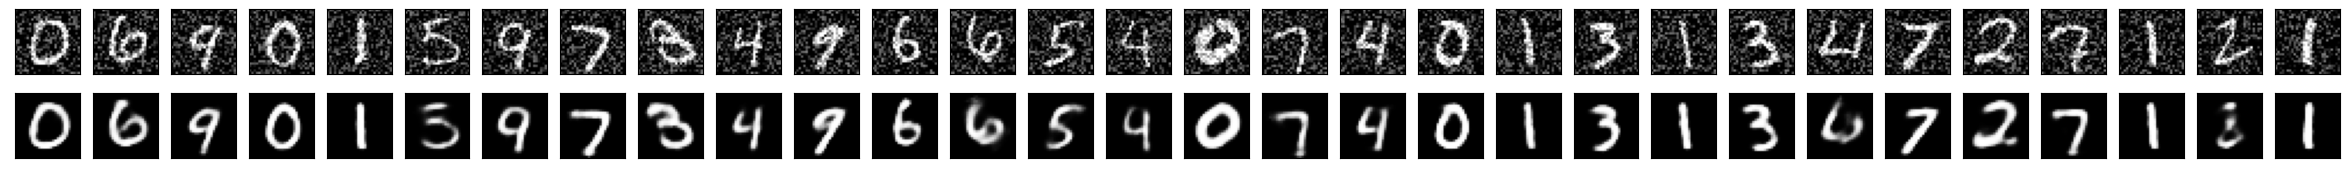

In [256]:
draw_result(x_test_0_5, 30, 100)

### Noise = 1

In [249]:
batch_size = 100
epochs = 20


# noise = 0
autoencoder.fit(x_train_1, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0240
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0225
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0220
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0217
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0215
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0214
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0212
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0211
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0210
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0209
Epoch 11/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0208
Epoch 12/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0208
Epoch 13/20
600/600 [====

1/1 [==============================] - 0s 31ms/step


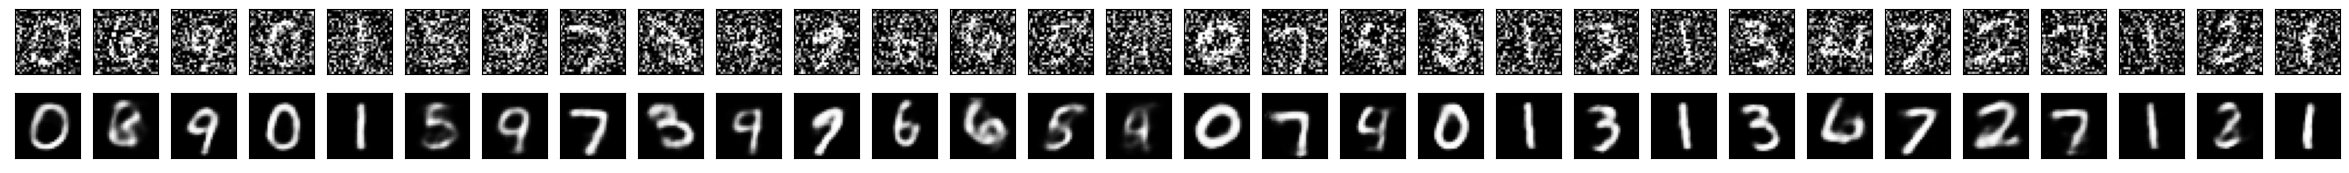

In [257]:
draw_result(x_test_1, 30, 100)

### Noise = 1.5

In [251]:
batch_size = 100
epochs = 20


# noise = 0
autoencoder.fit(x_train_1_5, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0365
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0346
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0340
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0335
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0332
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0329
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0327
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0325
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0324
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0322
Epoch 11/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0321
Epoch 12/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0319
Epoch 13/20
600/600 [====

1/1 [==============================] - 0s 26ms/step


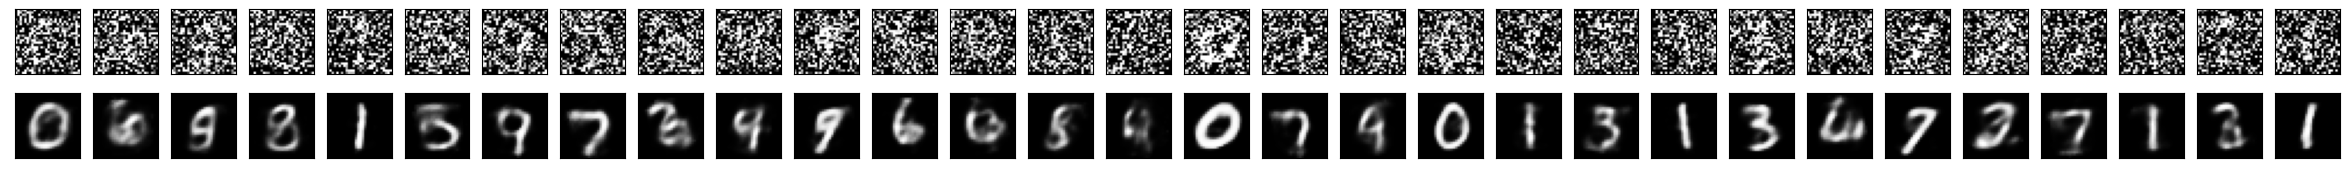

In [253]:
draw_result(x_test_1_5, 30, 100)

In [265]:
import torch
from torch import flatten

torch.Size([28, 28, 1])

# 2)Pytorch model

In [39]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ExponentialLR, CosineAnnealingLR
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, in_dim, batch_size):
        super(Autoencoder, self).__init__()
        self.in_dim = in_dim
        self.batch_size = batch_size
        self.fc1 = nn.Linear(self.in_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 49)
        self.fc4 = nn.Linear(49, 64)
        self.fc5 = nn.Linear(64, self.in_dim)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.sigm = nn.Sigmoid()

    def forward(self, img):
        # shape: ([batch, 28, 28, 1])
        img = img
        # shape: ([batch, 784])
        x = torch.flatten(img, start_dim=1)

        # encoder
        fc1 = self.tanh(self.fc1(x))
        fc2 = self.tanh(self.fc2(fc1))
        encoded = self.tanh(self.fc3(fc2))

        # decoder
        fc4 = self.tanh(self.fc4(encoded))
        # shape: ([batch_size, 784])
        decoded = self.sigm(self.fc5(fc4))
        return decoded

    def predict(self, img):
        # shape: ([batch, 28, 28, 1])
        img = img
        # shape: ([batch*28*28*1])
        x = torch.flatten(img, start_dim=1)

        # encoder
        fc1 = self.tanh(self.fc1(x))
        fc2 = self.tanh(self.fc2(fc1))
        encoded = self.tanh(self.fc3(fc2))

        # decoder
        fc4 = self.tanh(self.fc4(encoded))
        decoded = self.sigm(self.fc5(fc4))
        return decoded
        

In [40]:
x_train.shape

(48000, 28, 28, 1)

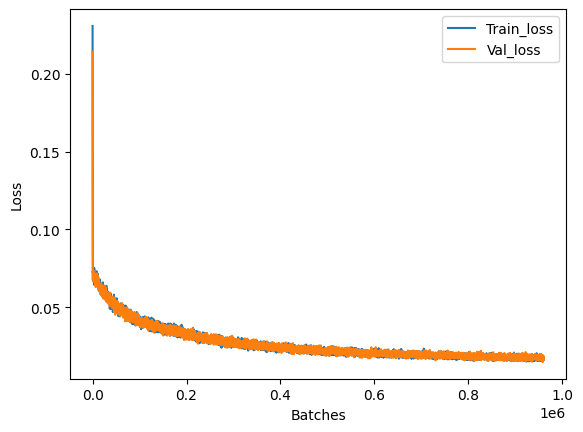

100%|████████████████████████████████████████████████████████████████████████████████| 480/480 [07:43<00:00,  1.04it/s]


In [41]:
learning_rate = 0.009
epoches = 20
batch_size = 100
report_step = 10

in_dim = 784
model_pytorch = Autoencoder(in_dim, batch_size)

c = 0
j = 0
count = []
losses = []
val_losses = []

optimizer = optim.Adam(model_pytorch.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
scheduler = CosineAnnealingLR(optimizer, 1650*epoches)

for epoch in range(epoches):
    model_pytorch.train()
    for i in tqdm(range(int(len(x_train)/batch_size))):
        # shape: ([batch, 28, 28, 1])
        x = torch.tensor(x_train[i * batch_size : (i+1) * batch_size], dtype=torch.float, requires_grad=True)
        y = torch.tensor(x_train[i * batch_size : (i+1) * batch_size], dtype=torch.float, requires_grad=True)
        

        # shape: ([batch, 28, 28, 1])
        output = model_pytorch(x)
        y = y.reshape(batch_size, -1)
        # shape: ([batch, 784]), shape: ([batch, 784])
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if j % report_step == 0:
            scheduler.step()
        
        losses.append(loss.item())
        count.append(c)
        c += batch_size

        with torch.no_grad():
            indexes = random.sample(range(len(x_val)), batch_size)
            x = torch.tensor([x_val[i] for i in sorted(indexes)], dtype=torch.float)
            y = torch.tensor([x_val[i] for i in sorted(indexes)], dtype=torch.float)

            # shape: ([batch, 28, 28, 1])
            val_output = model_pytorch(x)
            y = y.reshape(batch_size, -1)
            # shape: ([batch, 784]), shape: ([batch, 784])
            val_loss = criterion(val_output, y)
            val_losses.append(val_loss.item())
        
        
        display.clear_output(wait=True)
        plt.plot(count, losses, label='Train_loss') 
        plt.plot(count, val_losses, label='Val_loss')
        plt.legend()
        plt.xlabel('Batches')
        plt.ylabel('Loss')
        plt.show()

# save weights
torch.save(model_pytorch.state_dict(), "numbers_model.pt")

In [49]:
def draw_result(x_test,  autoencoder, n = 30, step = 0):
    imgs = x_test[step:step + n]
    decoded_imgs = autoencoder.predict(torch.tensor(x_test[step:step + n], dtype=torch.float, requires_grad=True)).reshape(-1, 28, 28, 1)

    plt.figure(figsize=(n, 2))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(imgs[i].squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax2 = plt.subplot(2, n, i + n + 1)
        plt.imshow(decoded_imgs[i].squeeze().detach().numpy(), cmap='gray')
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)

    plt.show()

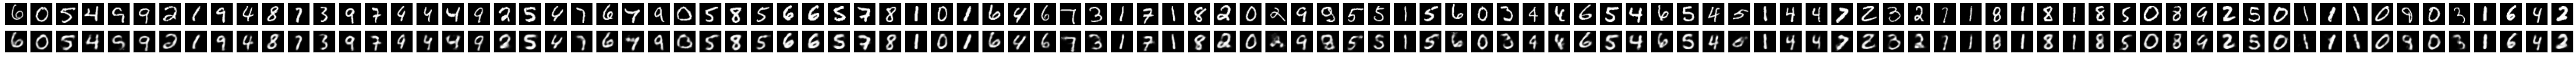

In [50]:
draw_result(x_test, model_pytorch, n = batch_size, step = 100)